<a href="https://colab.research.google.com/github/rociodemaio/COP-1047/blob/main/D206_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving churn_raw_data.csv to churn_raw_data.csv


In [4]:
df = pd.read_csv('churn_raw_data.csv')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [6]:
df_encoded = pd.get_dummies(df, columns=['Zip'])


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [8]:
#Detecting missing values in percentage
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


Unnamed: 0               0.00
CaseOrder                0.00
Customer_id              0.00
Interaction              0.00
City                     0.00
State                    0.00
County                   0.00
Zip                      0.00
Lat                      0.00
Lng                      0.00
Population               0.00
Area                     0.00
Timezone                 0.00
Job                      0.00
Children                24.95
Age                     24.75
Education                0.00
Employment               0.00
Income                  24.90
Marital                  0.00
Gender                   0.00
Churn                    0.00
Outage_sec_perweek       0.00
Email                    0.00
Contacts                 0.00
Yearly_equip_failure     0.00
Techie                  24.77
Contract                 0.00
Port_modem               0.00
Tablet                   0.00
InternetService          0.00
Phone                   10.26
Multiple                 0.00
OnlineSecu

In [9]:
#Checking for duplicates
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Unnamed: 0, CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

[0 rows x 52 columns]


In [10]:
#selecting numerical values only in order to impute missing data with median or mean
numerical_columns = df.select_dtypes(include=[np.number])



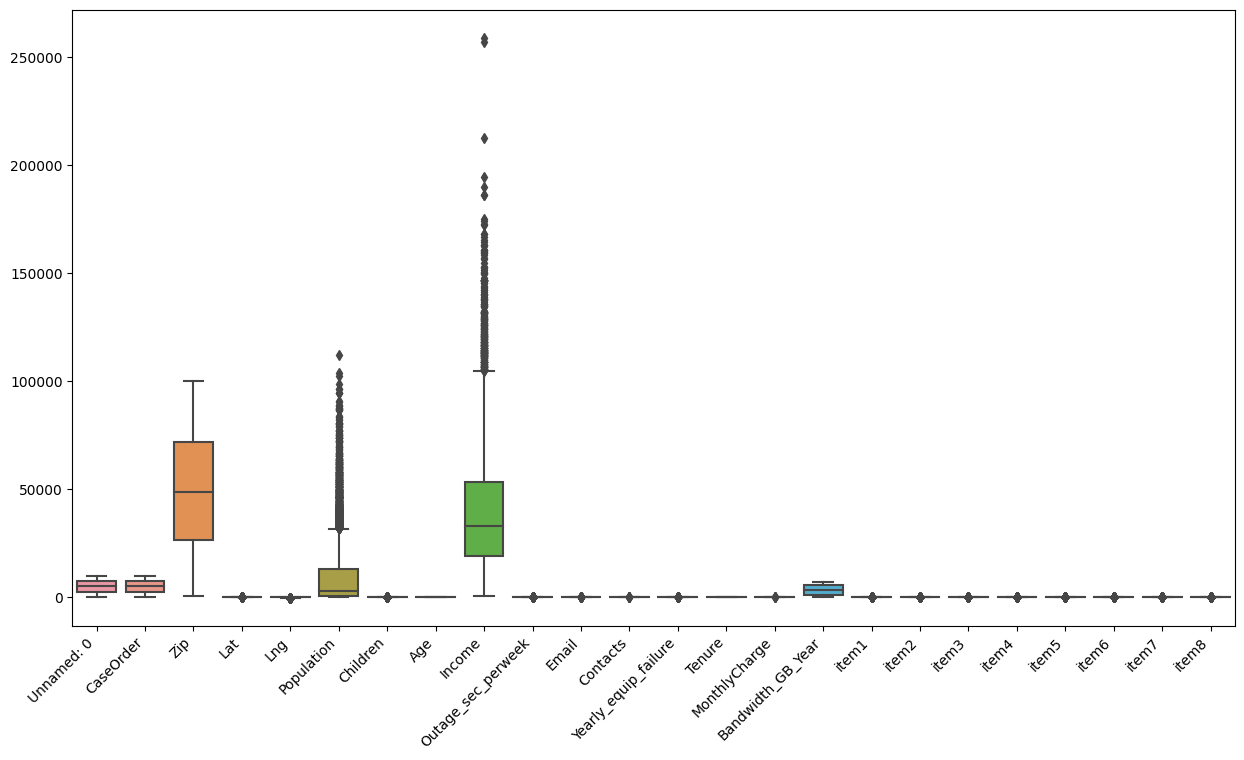

In [11]:
#Checking for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=numerical_columns)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [12]:
#Creating a list for Missing values
columns_with_missing_values = ['Children', 'Age', 'Income', 'Techie', 'Phone', 'TechSupport', 'Tenure', 'Bandwidth_GB_Year']


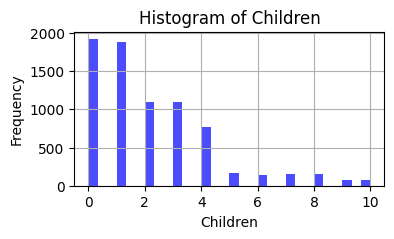

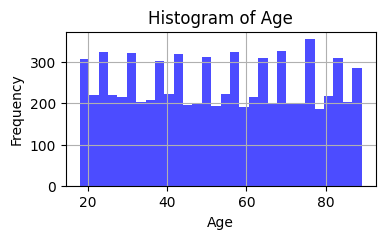

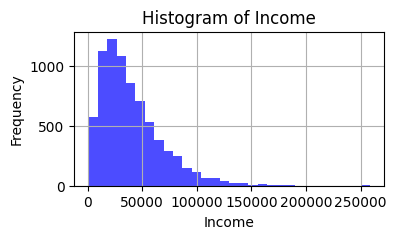

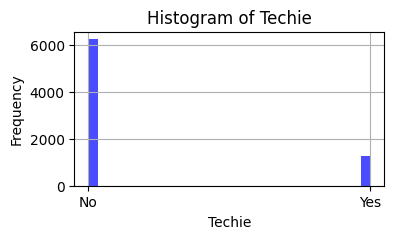

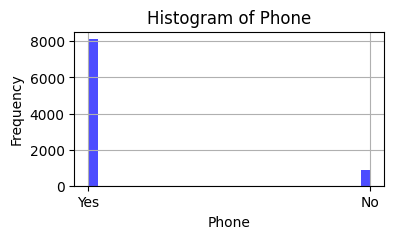

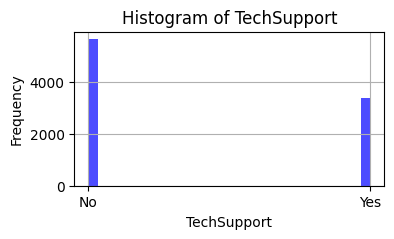

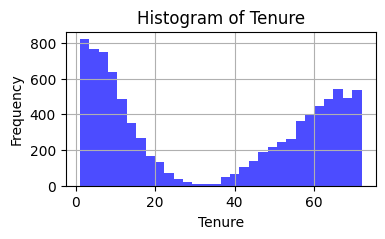

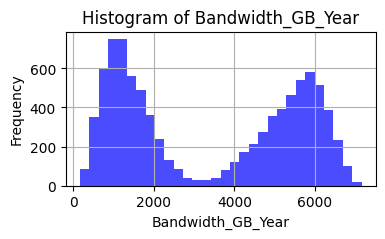

In [13]:
#Creating histogranms in order to check distributions
for column in columns_with_missing_values:
    plt.figure(figsize=(4, 2))
    df[column].hist(bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [14]:
from sklearn.impute import SimpleImputer


In [15]:
#Imputing missing values for numerical columns that have normal distribution
numerical_columns_normal_dist = ['Age']
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_columns_normal_dist] = numerical_imputer.fit_transform(df[numerical_columns_normal_dist])


In [16]:
#Imputing missing values for numerical columns that have skewed or bimodal distributions
numerical_columns_skewed_and_bimodal = ['Children', 'Income', 'Tenure', 'Bandwidth_GB_Year']
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_columns_skewed_and_bimodal] = numerical_imputer.fit_transform(df[numerical_columns_skewed_and_bimodal])


In [17]:
#Imputing missing values for categorical columns
categorical_columns = ['Techie', 'Phone', 'TechSupport']
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [18]:
#Checking for effectiveness
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


Unnamed: 0              0.0
CaseOrder               0.0
Customer_id             0.0
Interaction             0.0
City                    0.0
State                   0.0
County                  0.0
Zip                     0.0
Lat                     0.0
Lng                     0.0
Population              0.0
Area                    0.0
Timezone                0.0
Job                     0.0
Children                0.0
Age                     0.0
Education               0.0
Employment              0.0
Income                  0.0
Marital                 0.0
Gender                  0.0
Churn                   0.0
Outage_sec_perweek      0.0
Email                   0.0
Contacts                0.0
Yearly_equip_failure    0.0
Techie                  0.0
Contract                0.0
Port_modem              0.0
Tablet                  0.0
InternetService         0.0
Phone                   0.0
Multiple                0.0
OnlineSecurity          0.0
OnlineBackup            0.0
DeviceProtection    

In [19]:
#Outliers for Population

from scipy.stats import zscore

# Calculating z-scores for the Population column
z_scores_population = zscore(df['Population'])

# Identifying outliers using a threshold
outliers_population = (abs(z_scores_population) > 3)

# Counting the number of outliers
count_outliers_population = outliers_population.sum()

print(f'Number of outliers in Population: {count_outliers_population}')

Number of outliers in Population: 219


In [20]:
#Outliers for income
from scipy.stats import zscore

# Calculating z-scores for the Population column
z_scores_income = zscore(df['Income'])

# Identifying outliers using a threshold
outliers_income = (abs(z_scores_income) > 3)

# Counting the number of outliers
count_outliers_income = outliers_income.sum()

print(f'Number of outliers in Income: {count_outliers_income}')

Number of outliers in Income: 193


In [21]:
#Treating outliers for population - Winsorizying Population column
upper_bound = df['Population'].quantile(0.95)
df['Population'] = df['Population'].clip(upper=upper_bound)

In [22]:
#Treating outliers for Income - Winsorizying Income column
upper_bound = df['Income'].quantile(0.95)
df['Income'] = df['Income'].clip(upper=upper_bound)

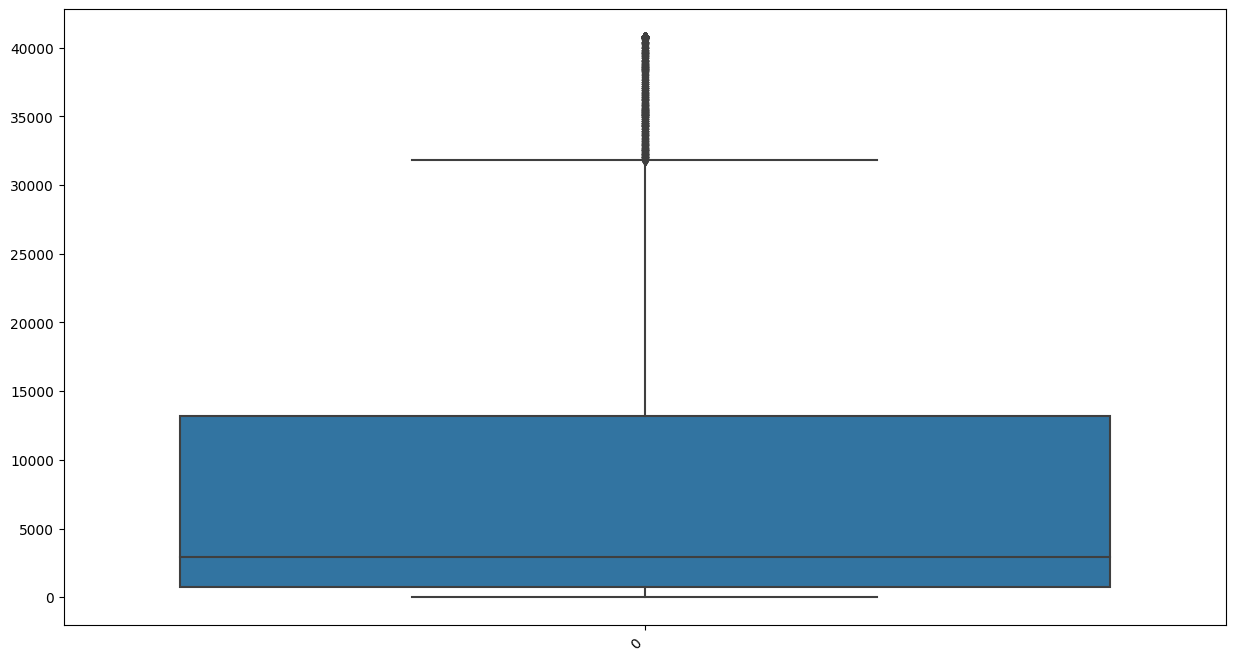

In [23]:
#Checking effectiveness
plt.figure(figsize=(15, 8))
sns.boxplot(data=df['Population'])
plt.xticks(rotation=45, ha='right')
plt.show()

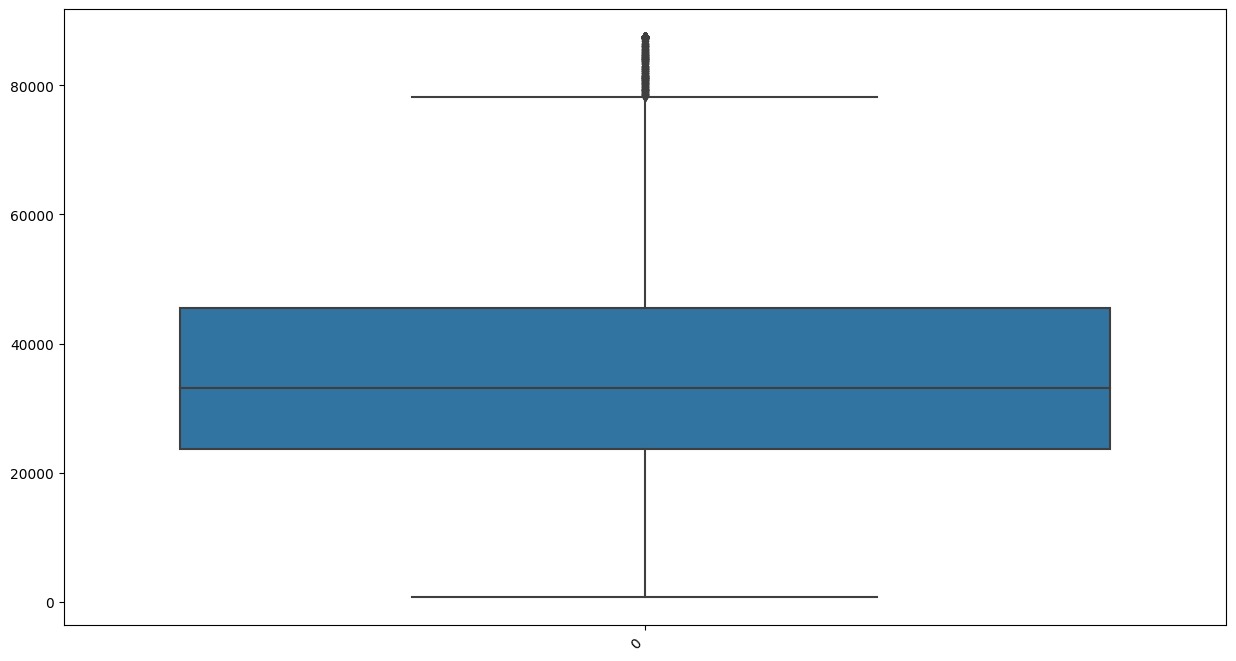

In [24]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df['Income'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [25]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
pd.set_option('display.max_columns', None)

In [36]:
#Drop 'Unamed' and 'CaseOrder' column from the numerical columns list

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
columns_to_exclude = ['Unnamed: 0', 'CaseOrder']
numerical_columns = [col for col in numerical_columns if col not in columns_to_exclude]


In [27]:
#Drop 'Zip' column from the numerical columns list
numerical_columns = [col for col in numerical_columns if col != 'Zip']


In [28]:
# Standardizing the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])


In [29]:
# Applying PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)


In [30]:
 #Displaying the total number of principal components
total_components = pca.components_.shape[0]
print(f"Total Number of Principal Components: {total_components}")


Total Number of Principal Components: 21


In [31]:
# Display the principal components loading matrix without the 'Zip' column
loading_matrix = pd.DataFrame(pca.components_, columns=numerical_columns)
print("\nPrincipal Components Loading Matrix:")
print(loading_matrix)


Principal Components Loading Matrix:
         Lat       Lng  Population  Children       Age    Income  \
0  -0.001253  0.008099   -0.002232  0.000480  0.005056  0.002261   
1  -0.021668  0.009936   -0.001026 -0.001078 -0.013215  0.005198   
2  -0.009375  0.023352    0.018592  0.010397 -0.017086  0.026618   
3   0.708462 -0.194549   -0.645695  0.036786 -0.021812  0.080805   
4  -0.053768  0.064279    0.046610  0.017945 -0.042049 -0.046870   
5  -0.099542  0.546955   -0.189169  0.641036 -0.320603  0.122392   
6   0.015718 -0.620196    0.310573  0.107055 -0.406088  0.078386   
7  -0.073715  0.068240    0.029112  0.019290  0.442146  0.170499   
8  -0.017872 -0.053414    0.128490  0.077364 -0.097358  0.863633   
9   0.061045 -0.225713    0.016299  0.295341  0.387284  0.244532   
10  0.039908 -0.109470    0.020844  0.162230 -0.502468 -0.184200   
11 -0.030114  0.279310   -0.146735 -0.672625 -0.325733  0.303514   
12 -0.005543  0.067082   -0.006674  0.004450  0.104567 -0.067355   
13 -0.0555

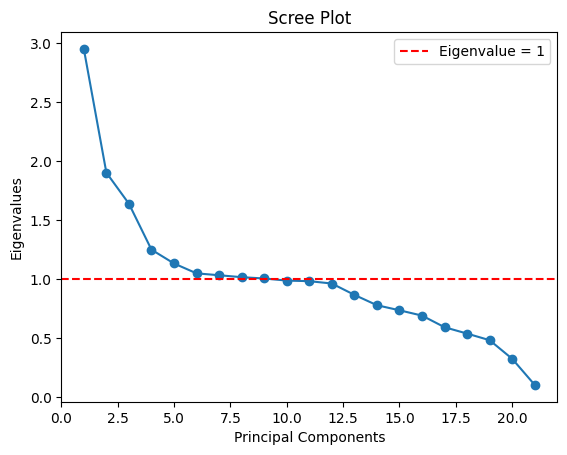

In [32]:
import matplotlib.pyplot as plt

# Plotting in a scree plot
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color="red", linestyle="--", label="Eigenvalue = 1")
plt.legend()
plt.show()

In [33]:
from sklearn.decomposition import PCA

# Specifying the number of components to retain based on the scree plot
n_components = 8

# Fit PCA with the chosen number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

In [34]:
# Set the threshold for eigenvalues
eigenvalue_threshold = 1

# Identify components with eigenvalues greater than or equal to the threshold
selected_components = [i for i, eigenvalue in enumerate(pca.explained_variance_) if eigenvalue >= eigenvalue_threshold]

# Extract variable names for the selected components
selected_component_variable_names = loading_matrix.iloc[:, selected_components].columns.tolist()

# Print or use the selected variable names
print("Variable names with eigenvalues greater than 1:", selected_component_variable_names)

Variable names with eigenvalues greater than 1: ['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email']


In [35]:
#Exporting clean CSV file
df.to_csv('churn_raw_data.csv', index=False)
